In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
import sklearn.datasets
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [77]:
data = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data['label'] = breast_cancer_dataset.target
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [78]:
data.shape

(569, 31)

In [79]:
data.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [80]:
data['label'].value_counts()     # 1 - beningn  0 - malignant

,count
label,
1,357
0,212


In [81]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [82]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 7)
xtest

array([[1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
        6.825e-02],
       [1.553e+01, 3.356e+01, 1.037e+02, ..., 2.014e-01, 3.512e-01,
        1.204e-01],
       [1.193e+01, 2.153e+01, 7.653e+01, ..., 7.247e-02, 2.438e-01,
        8.541e-02],
       ...,
       [1.175e+01, 1.756e+01, 7.589e+01, ..., 1.010e-01, 2.478e-01,
        7.757e-02],
       [1.735e+01, 2.306e+01, 1.110e+02, ..., 8.235e-02, 2.452e-01,
        6.515e-02],
       [1.359e+01, 2.184e+01, 8.716e+01, ..., 6.189e-02, 2.446e-01,
        7.024e-02]])

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)   # Learn and transform
xtest = scaler.transform(xtest)

In [84]:
import tensorflow as tf
from tensorflow import keras

In [85]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [86]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [87]:
history = model.fit(xtrain, ytrain, validation_split = 0.1, epochs = 14)

Epoch 1/14
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7455 - loss: 0.4589 - val_accuracy: 0.8478 - val_loss: 0.6217
Epoch 2/14
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8862 - loss: 0.3112 - val_accuracy: 0.8913 - val_loss: 0.5293
Epoch 3/14
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9163 - loss: 0.2327 - val_accuracy: 0.8913 - val_loss: 0.4686
Epoch 4/14
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9272 - loss: 0.2062 - val_accuracy: 0.9130 - val_loss: 0.4232
Epoch 5/14
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9355 - loss: 0.1835 - val_accuracy: 0.9348 - val_loss: 0.3886
Epoch 6/14
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9517 - loss: 0.1753 - val_accuracy: 0.9348 - val_loss: 0.3584
Epoch 7/14
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9413 - loss: 0.1703 - val_accuracy: 0.9348 - val_loss: 0.3323
Epoch 8/14
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9772 - loss: 0.1217 - val_accuracy: 0.9348 - val_loss

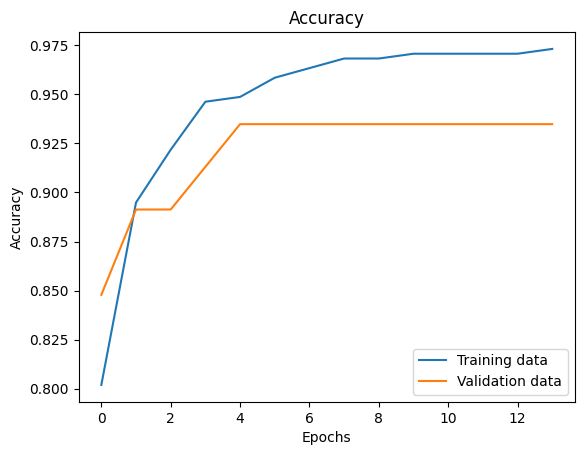

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')
plt.show()

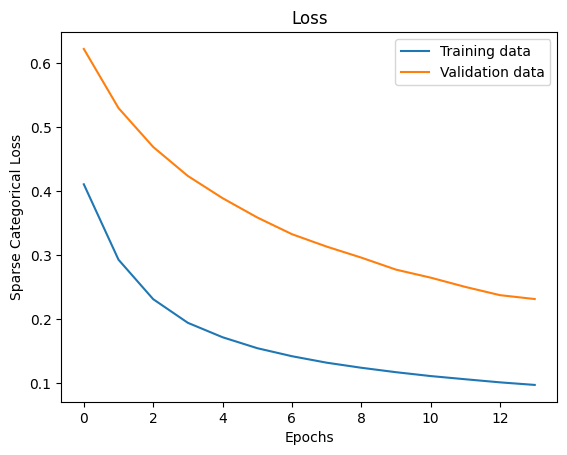

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Sparse Categorical Loss')
plt.xlabel('Epochs')
plt.legend(['Training data', 'Validation data'])
plt.show()

In [92]:
ypred = model.predict(xtest)
ypred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[7.3904204e-01, 9.9970692e-01],
       [9.1455495e-01, 6.0789022e-03],
       [7.2984236e-01, 9.7637135e-01],
       [4.6011108e-01, 9.9929804e-01],
       [4.3284211e-01, 9.6333528e-01],
       [9.4264740e-01, 2.2922035e-02],
       [4.4142717e-01, 9.3586063e-01],
       [5.9885871e-01, 9.8442847e-01],
       [5.7465357e-01, 2.2573356e-01],
       [7.8365391e-01, 9.9756598e-01],
       [6.8765754e-01, 1.4001621e-01],
       [9.2881131e-01, 1.9340497e-02],
       [4.0201673e-01, 3.9183286e-01],
       [7.0778430e-01, 9.9972737e-01],
       [4.6535066e-01, 9.6483684e-01],
       [4.9718049e-01, 8.7960982e-01],
       [8.1738490e-01, 9.9087781e-01],
       [5.7806063e-01, 9.2340410e-01],
       [9.6652091e-01, 4.3454319e-03],
       [5.8268470e-01, 1.6938724e-01],
       [9.9890220e-01, 8.2049097e-05],
       [9.5564759e-01, 2.7324738e-02],
       [9.9972290e-01, 2.9551287e-05],
       [7.4903774e-01, 9.5665205e-01],
       [6.5221941e-01, 6.1578315e-01],
       [5.8551234e-01, 3.

In [93]:
ypred = np.argmax(ypred, axis = 1)
ypred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1])